In this experiment, I want to plot the mail communication done by Sara Shackleton by using the new parsing library. From exp 005 we can see that Sara seems to have quite consistent working hours until summer 2001. Let's check if this holds also for the raw data points.

In [1]:
%run ../src/parse_mails2.py

df = parse_maildir2("../data/maildir")

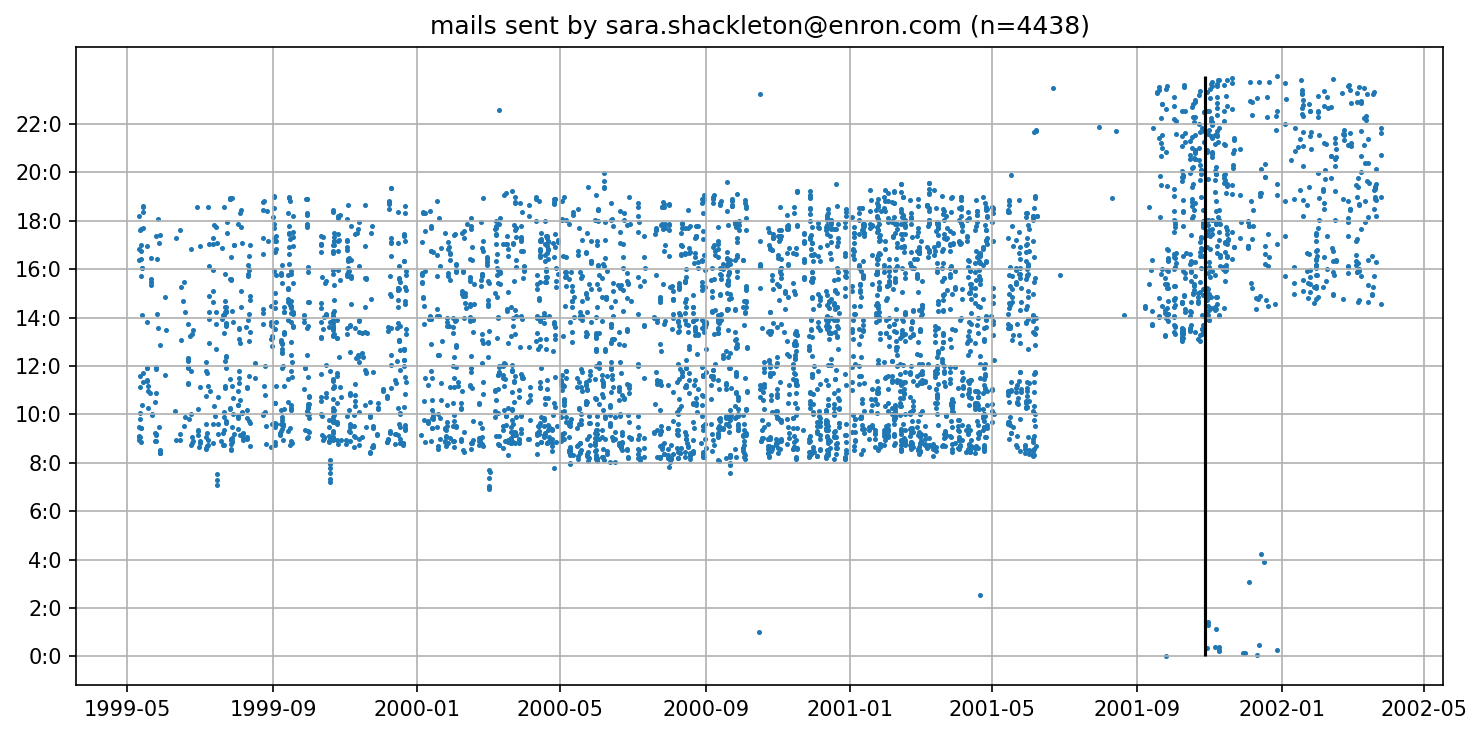

In [68]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=150)
def seconds_in_time(x, pos):
    hours = x // 3600
    minutes = (x - (hours * 3600)) // 60
    return '%d:%d' % (hours, minutes)

formatter = FuncFormatter(seconds_in_time)

mails_sara = df[df["from"] == "sara.shackleton@enron.com"]
ax.scatter(mails_sara["date"], mails_sara["seconds_since_midnight"], s=2)
ax.grid(True)
ax.set_title(f"mails sent by sara.shackleton@enron.com (n={len(mails_sara)})")
ax.set_yticks([i * 7200 for i in range(12)])
ax.vlines(dt.datetime(2001, 10, 28), 0, 24 * 60 * 60, color="black") # begin of winter time in 2001
ax.yaxis.set_major_formatter(formatter)
fig.tight_layout()
fig.savefig("exp009.pdf")
plt.show()

This data shows a cut in July 2001, followed by a shift of ~5h (6h, after the change to winter time) in the data. What happened here? We can see a similar shift in all data sets (see exp006). Let's find out.

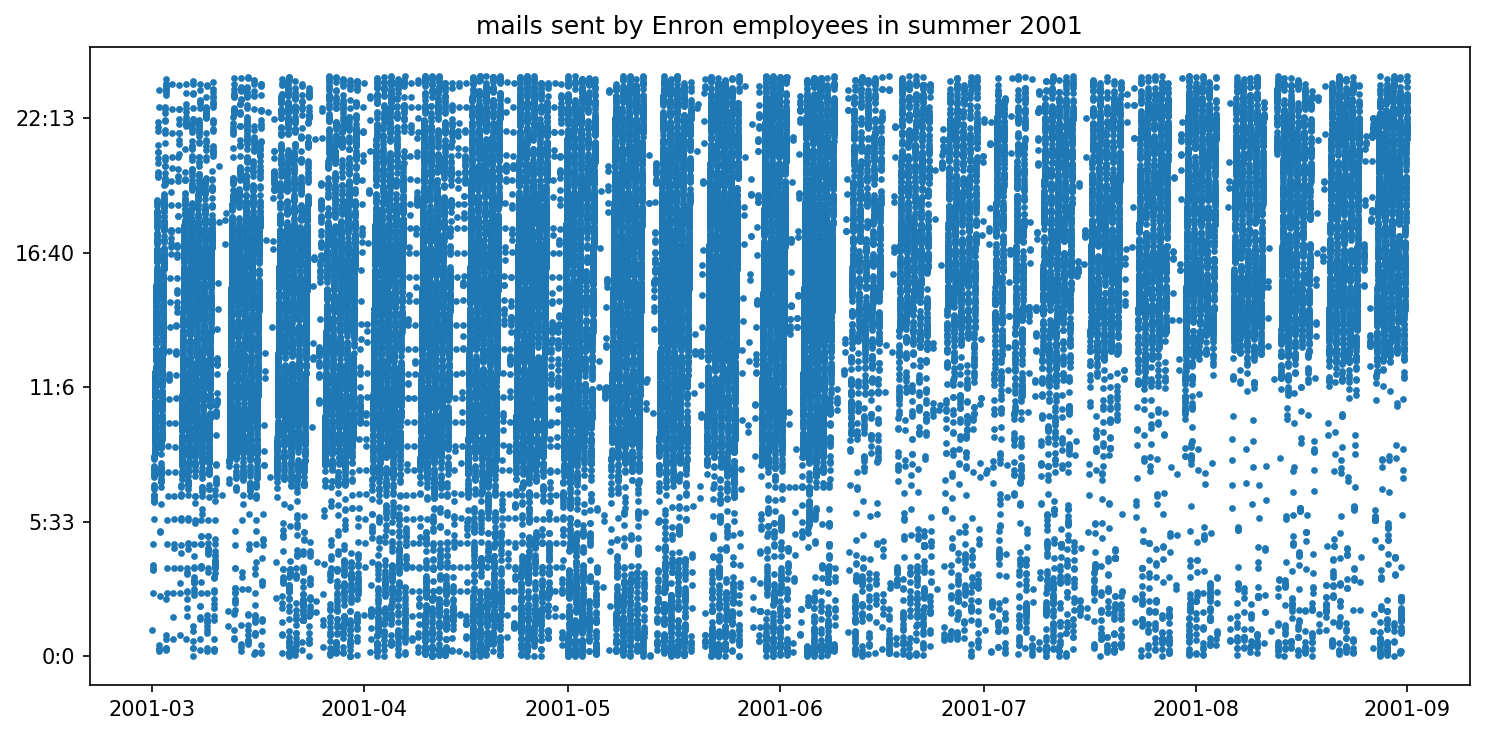

In [33]:
m = df[(df["date"] > "2001/03/01") & (df["date"] < "2001/09/01")]
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=150)

ax.scatter(m["date"], m["seconds_since_midnight"], s=5)
ax.set_title(f"mails sent by Enron employees in summer 2001")
ax.yaxis.set_major_formatter(formatter)
fig.tight_layout()
plt.show()

In May 2001, there is basically no "night" window in which less mails are sent. Starting ~June 15th, the timeframe between midnight and 11 is very scarsly populated with data. Let's find out if there was a system upgrade in the Enron mail systems.

In [29]:
m[m["subject"].str.contains("maintenance", case=False)]

,from,to,subject,date,week,year,month,seconds_since_midnight
../data/maildir/love-p/central/33.,shirley.mcdowell@enron.com,c..gossett@enron.com,FW: TRV Maintenance Request,2001-08-28 16:13:46+00:00,35,2001,8,58426
../data/maildir/blair-l/deleted_items/_sent_mail/16.,lynn.blair@enron.com,"joe.linhart@enron.com, john.buchanan@enron.com...","Maintenance Notes on El Paso, ANR, NOVA, and NGPL",2001-06-24 20:25:00+00:00,25,2001,6,73500
../data/maildir/kaminski-v/inbox/229.,supatgiat@enron.com,shirley.crenshaw@enron.com,FW: CPLEX Maintenance,2001-06-06 00:00:49+00:00,23,2001,6,49
../data/maildir/benson-r/inbox/279.,administration.enron@enron.com,None,Server Maintenance: Nahou-msmbx05v,2001-08-30 21:51:49+00:00,35,2001,8,78709
../data/maildir/germany-c/inbox/126.,sylvia.campos@enron.com,chris.germany@enron.com,Global Facilities - Maintenance Request - Comp...,2001-06-05 21:29:42+00:00,23,2001,6,77382
../data/maildir/nemec-g/inbox/884.,mark.knippa@enron.com,gerald.nemec@enron.com,FW: OGS Maintenance Agreement - Draft,2001-06-26 16:16:11+00:00,26,2001,6,58571
../data/maildir/hyvl-d/all_documents/1497.,taffy.milligan@enron.com,robert.rose@enron.com,Re: MUD 23 Access & Maintenance Agreement,2001-05-30 19:37:00+00:00,22,2001,5,70620
../data/maildir/hyvl-d/all_documents/1488.,robert.rose@enron.com,dan.hyvl@enron.com,MUD 23 Access & Maintenance Agreement,2001-05-30 15:48:00+00:00,22,2001,5,56880
../data/maildir/hyvl-d/all_documents/1499.,dan.hyvl@enron.com,robert.rose@enron.com,Re: MUD 23 Access & Maintenance Agreement,2001-05-31 07:48:00+00:00,22,2001,5,28080
../data/maildir/zipper-a/deleted_items/415.,gail.kettenbrink@enron.com,"michael.barber@enron.com, michael.belmont@enro...",FW: EBS Maintenance Notification,2001-06-05 13:20:27+00:00,23,2001,6,48027


Looking through some mails of this period, we can see mails sent from "administration.enron@enron.com". Looking for emails specifically sent from this mail address, we can find mails that refer to some Outlook migration that happened in the past. Looking for the Keyword "Outlook Migration", we can see that there is a complete mailbox just dealing with Outlook migration. Lets have a look at mails sent from that account:

In [35]:
df[(df["from"] == "outlook.team@enron.com") & (df["date"] > "2001/05/01") & (df["date"] < "2001/09/01")].sort_values(by="date")


,from,to,subject,date,week,year,month,seconds_since_midnight
../data/maildir/skilling-j/inbox/128.,outlook.team@enron.com,"rebecca.ford@enron.com, adrian.ausucua@enron.c...",1-URGENT - Outlook Email Notification (new),2001-05-01 00:08:00+00:00,18,2001,5,480
../data/maildir/skilling-j/inbox/129.,outlook.team@enron.com,"rebecca.ford@enron.com, adrian.ausucua@enron.c...",2- SURVEY/INFORMATION EMAIL,2001-05-01 00:08:00+00:00,18,2001,5,480
../data/maildir/skilling-j/inbox/130.,outlook.team@enron.com,"rebecca.ford@enron.com, adrian.ausucua@enron.c...",3 - URGENT - TO PREVENT LOSS OF INFORMATION,2001-05-01 00:10:00+00:00,18,2001,5,600
../data/maildir/skilling-j/inbox/131.,outlook.team@enron.com,"rebecca.ford@enron.com, adrian.ausucua@enron.c...",4-URGENT - OWA Please print this now.,2001-05-01 00:11:00+00:00,18,2001,5,660
../data/maildir/keavey-p/inbox/144.,outlook.team@enron.com,"ann.vaughn@enron.com, wilson.barbee@enron.com,...",2- SURVEY/INFORMATION EMAIL 5-03-01,2001-05-01 00:44:00+00:00,18,2001,5,2640
...,...,...,...,...,...,...,...,...
../data/maildir/dasovich-j/deleted_items/416.,outlook.team@enron.com,"lauren.hagerty@enron.com, johan.zaayman@enron....",1-URGENT - Outlook Email Notification (new),2001-07-31 00:53:00+00:00,31,2001,7,3180
../data/maildir/dasovich-j/deleted_items/415.,outlook.team@enron.com,"lauren.hagerty@enron.com, johan.zaayman@enron....",2- SURVEY/INFORMATION EMAIL - 8/1/01,2001-07-31 00:54:00+00:00,31,2001,7,3240
../data/maildir/dasovich-j/deleted_items/414.,outlook.team@enron.com,"lauren.hagerty@enron.com, johan.zaayman@enron....",3 - URGENT - TO PREVENT LOSS OF INFORMATION - ...,2001-07-31 00:54:00+00:00,31,2001,7,3240
../data/maildir/dasovich-j/deleted_items/413.,outlook.team@enron.com,"lauren.hagerty@enron.com, johan.zaayman@enron....",4-URGENT - OWA Please print this now.,2001-07-31 00:56:00+00:00,31,2001,7,3360


When looking into the content of those mails, we can see that for mails with the subject line "1-URGENT - Outlook Email Notification (new)", employees are notified when their Outlook migration date is. Lets find out if we can confirm the shift in the timeframe for some people at that date.

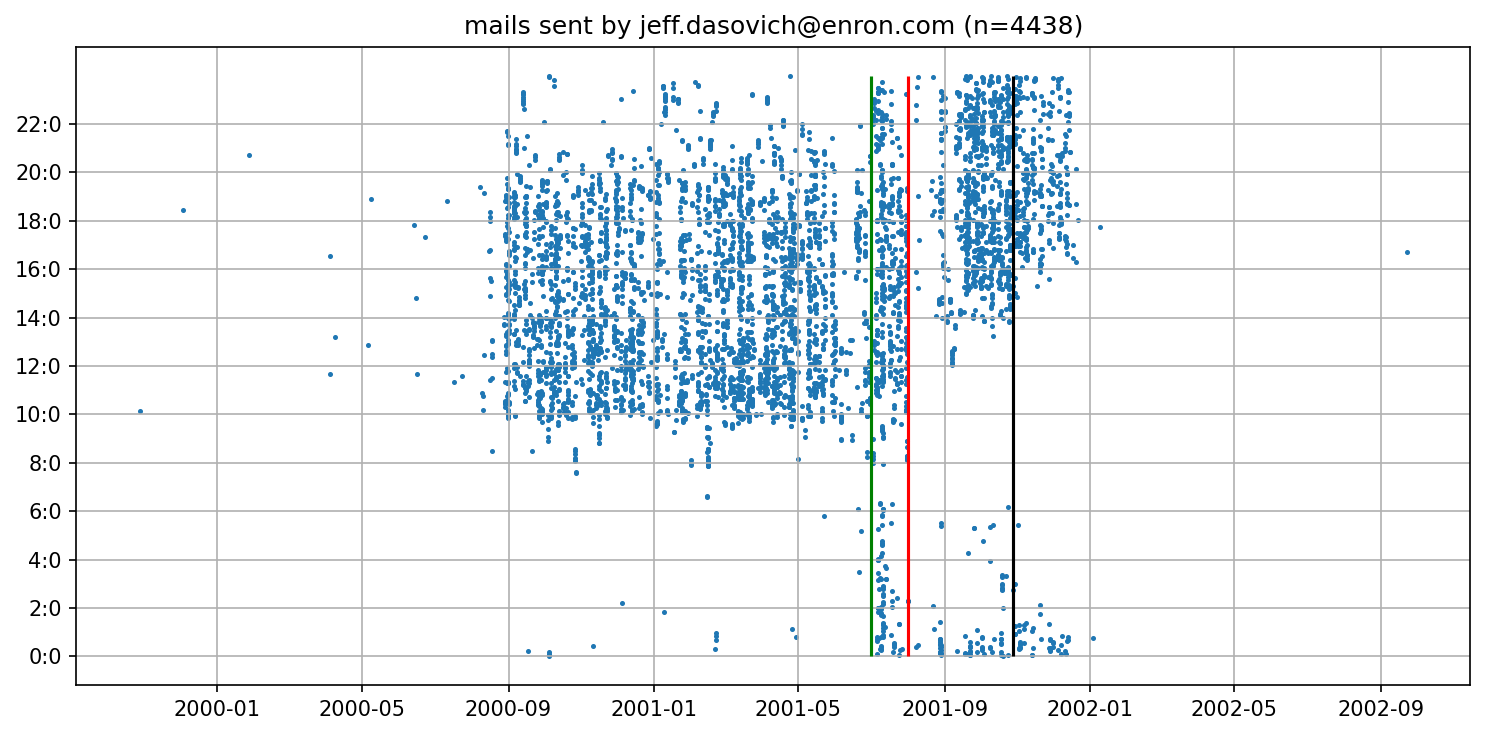

,from,to,subject,date,week,year,month,seconds_since_midnight
../data/maildir/dasovich-j/all_documents/29263.,outlook.team@enron.com,"lauren.hagerty@enron.com, johan.zaayman@enron....",1-URGENT - Outlook Email Notification (new),2001-07-30 14:53:00+00:00,31,2001,7,53580
../data/maildir/dasovich-j/deleted_items/416.,outlook.team@enron.com,"lauren.hagerty@enron.com, johan.zaayman@enron....",1-URGENT - Outlook Email Notification (new),2001-07-31 00:53:00+00:00,31,2001,7,3180


In [69]:
import datetime as dt
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=150)
mails_jeff = df[(df["from"] == "jeff.dasovich@enron.com")]
ax.scatter(mails_jeff["date"], mails_jeff["seconds_since_midnight"], s=2)
ax.vlines(dt.datetime(2001, 8, 1), 0, 60*60*24, color="red") # end of migration period
ax.vlines(dt.datetime(2001, 7, 1), 0, 60*60*24, color="green") # begin of migration period
ax.vlines(dt.datetime(2001, 10, 28), 0, 24 * 60 * 60, color="black") # begin of winter time in 2001
ax.set_yticks([i * 7200 for i in range(12)])
ax.grid(True)
ax.set_title(f"mails sent by jeff.dasovich@enron.com (n={len(mails_sara)})")
ax.yaxis.set_major_formatter(formatter)
fig.tight_layout()
plt.show()

df[df["to"].str.contains("jeff.dasovich") & (df["from"] == "outlook.team@enron.com") & (df["subject"] == "1-URGENT - Outlook Email Notification (new)")]

We can see that jeff.dasovich@enron.com received notifications on July 30 and 31. The messages indicate a mailbox migration on August 1. Indeed, we see a shift in his mail communication afterwards, but also some intense communication in the days before that day. The migration notification also informs employees that the mail communication of the last 30 days will automatically be migrated - so we might have some duplicates in this timeframe! For some reason, the date-header in the new mail system seems to be shifted by some hours for all employees. If we have duplicates in those 30 days (from old system and new system), they should appear with that exact shift.

In [59]:
mails_jeff[(mails_jeff["date"] > "2001-07-01") & (mails_jeff["date"] < "2001-08-01")].to_csv("mails_jeff.csv")

When we look at that data, we can see the following:
- many mails are still duplicate
- duplicate mails have difference in timestamp of either exactly 5 hrs or exactly 10 hrs

Let's find all duplicates!


In [85]:
df["hour"] = df["date"].apply(lambda x: x.time().hour)
df["minute"] = df["date"].apply(lambda x: x.time().minute)
df["second"] = df["date"].apply(lambda x: x.time().second)

d = df
d["duplicated"] = df.duplicated(subset=["subject", "from", "minute", "second"], keep=False)
d = d[d["duplicated"] == True]

In [87]:
d.sort_values(by=["subject", "date"])

,from,to,subject,date,week,year,month,seconds_since_midnight,hour,minute,second,duplicated
../data/maildir/sanders-r/all_documents/3472.,richard.sanders@enron.com,a-l-brian@fred.masterpage.com.pl,,1999-05-27 18:18:00+00:00,21,1999,5,65880,18,18,0,True
../data/maildir/sanders-r/all_documents/3487.,richard.sanders@enron.com,bwanarol@hotmail.com,,1999-06-08 17:55:00+00:00,23,1999,6,64500,17,55,0,True
../data/maildir/sanders-r/all_documents/3503.,richard.sanders@enron.com,drank@brcepat.com,,1999-06-14 17:02:00+00:00,24,1999,6,61320,17,2,0,True
../data/maildir/nemec-g/all_documents/128.,gerald.nemec@enron.com,gtownsend@manorisd.net,,1999-08-09 11:39:00+00:00,32,1999,8,41940,11,39,0,True
../data/maildir/nemec-g/all_documents/233.,gerald.nemec@enron.com,mcook@svdp-edu.org,,1999-10-07 16:34:00+00:00,40,1999,10,59640,16,34,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
../data/maildir/smith-m/inbox/259.,eddie.zhang@enron.com,"tara.piazze@enron.com, matt.smith@enron.com",west pl daily morning report,2001-06-05 13:10:15+00:00,23,2001,6,47415,13,10,15,True
../data/maildir/giron-d/all_documents/67.,darron.giron@enron.com,anne.bike@enron.com,what is your place in the kingdom?,2001-05-01 14:15:00+00:00,18,2001,5,51300,14,15,0,True
../data/maildir/giron-d/sent_items/89.,darron.giron@enron.com,anne.bike@enron.com,what is your place in the kingdom?,2001-05-02 00:15:00+00:00,18,2001,5,900,0,15,0,True
../data/maildir/benson-r/inbox/12.,daniel.diamond@enron.com,"robert.benson@enron.com, serena.bishop@enron.c...",you don't need access to stack manager?,2002-02-05 15:40:36+00:00,6,2002,2,56436,15,40,36,True


We can see that there are roughly 8k Mails duplicated with the known offset of 5h/10h, and we need to remove them in order not to bias our data. We consinder mails to be duplicate in that sense, if they have the same sender, subject and are sent in the exact same minute and seconds as each othter (hour and day might differ, though). We will keep the FIRST of those mails.

In [89]:
print(len(df))
df = df.sort_values(by="date").drop_duplicates(subset=["subject", "from", "minute", "second"],keep="first")
print(len(df))

197490
187606


Now, lets plot the data for Jeff again with the cleaned data.

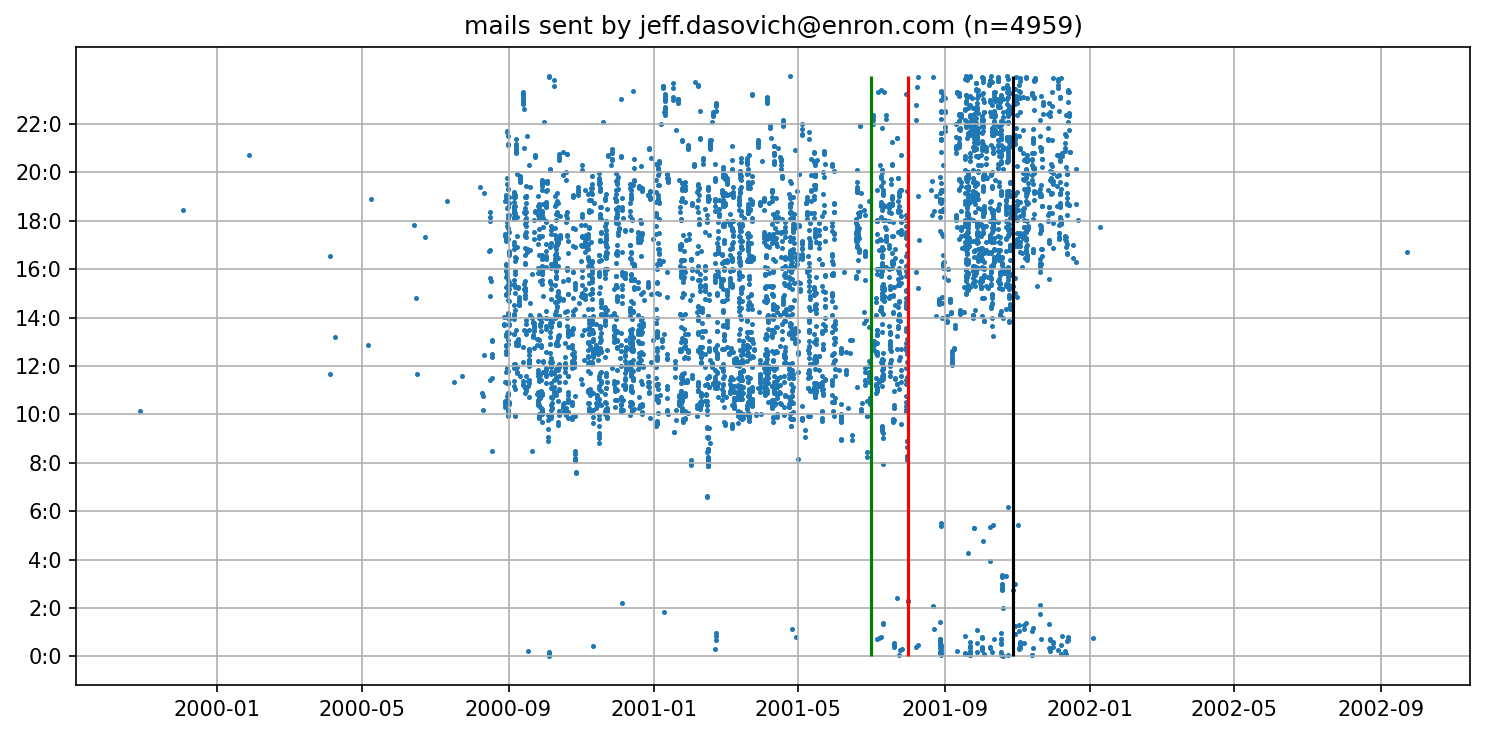

In [91]:
import datetime as dt
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=150)
mails_jeff = df[(df["from"] == "jeff.dasovich@enron.com")]
ax.scatter(mails_jeff["date"], mails_jeff["seconds_since_midnight"], s=2)
ax.vlines(dt.datetime(2001, 8, 1), 0, 60*60*24, color="red") # end of migration period
ax.vlines(dt.datetime(2001, 7, 1), 0, 60*60*24, color="green") # begin of migration period
ax.vlines(dt.datetime(2001, 10, 28), 0, 24 * 60 * 60, color="black") # begin of winter time in 2001
ax.set_yticks([i * 7200 for i in range(12)])
ax.grid(True)
ax.set_title(f"mails sent by jeff.dasovich@enron.com (n={len(mails_jeff)})")
ax.yaxis.set_major_formatter(formatter)
fig.tight_layout()
plt.show()

We can see that, in particular in the migration period for Jeff, we are able to reduce the noise by the redundandy check dramatically.